./result/20_500_0.9_0.7_0.9_49_map.txt ./result/20_500_0.9_0.7_0.9_49_dest.txt ./result/20_500_0.9_0.7_0.9_49_traps.txt
ssssss {'hit_wall': -10.0, 'destination': 5000.0, 'trap': -30.0, 'default': -0.1}


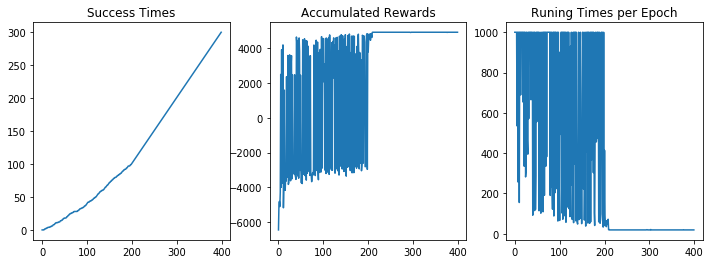

In [53]:
import Runner
import Maze
import Robot
import random
import numpy as np
import importlib

importlib.reload(Robot)
importlib.reload(Runner)
importlib.reload(Maze)

video_name = 'video_'
result_name = 'pic_'

file_prefix = './result/20_500_0.9_0.7_0.9_49'

mapfile = file_prefix+'_map.txt'
destfile = file_prefix+'_dest.txt'
trapfile = file_prefix+'_traps.txt'

## 可选的参数：
epoch = 400

epsilon0 = 0.9
alpha = 0.1
gamma = 0.9

# maze_size = (10,10)
# trap_number = 5

print(mapfile, destfile, trapfile)
g = Maze.Maze(from_file=mapfile)
g.set_dest_and_traps(dest_file=destfile, traps_file=trapfile)
r = Robot.Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner.Runner(r, g)
runner.run_training(epoch, training_per_epoch=g.height*g.width*10, display_direction=True)

#     vname = './result/{0}{0}{0}video{1}.mp4'.format(i, test_times)
#     picname = './result/{0}{0}{0}pic{1}'.format(i, test_times)
# print('generate', vname, picname)
#     runner.generate_movie(filename = vname)
# print(g)
runner.plot_results(save_file=None)

In [55]:
print(r.epsilon)

0.002755804065438185


In [56]:
r.Qstate_to_file('abcdefg.txt')

In [57]:
print(runner.train_robot_statics['times'][-10:])

[19, 19, 19, 19, 19, 19, 19, 19, 19, 19]


In [58]:
importlib.reload(Runner)
runner.generate_movie('abcdefg.mp4')

KeyError: (0, 0)